In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


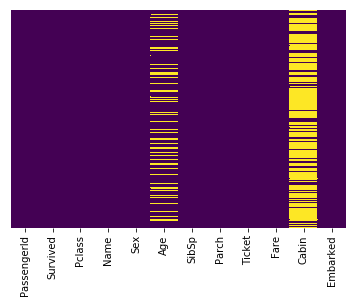

In [4]:
sns.heatmap(train.isnull(),yticklabels= False, cbar= False, cmap= 'viridis')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
sns.set_style('whitegrid')

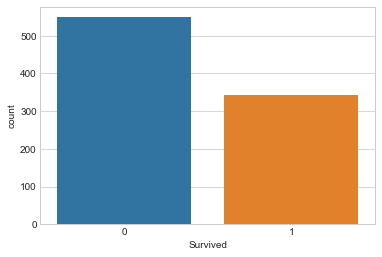

In [7]:
sns.countplot(x='Survived', data= train)

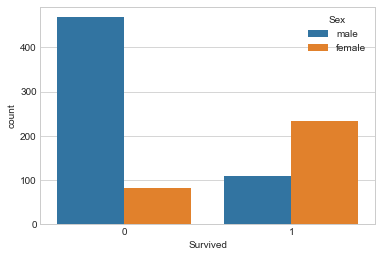

In [8]:
sns.countplot(x='Survived', data= train, hue= 'Sex')

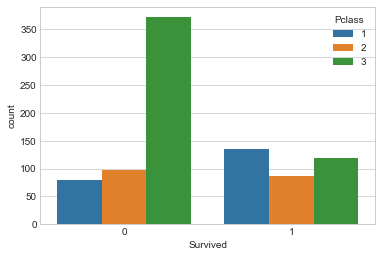

In [9]:
sns.countplot(x='Survived', data= train, hue= 'Pclass')

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

c:\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


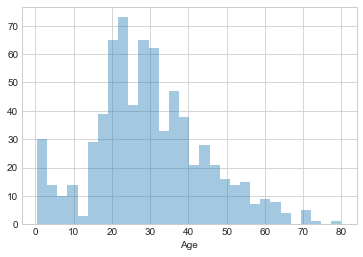

In [11]:
sns.distplot(train['Age'].dropna(), kde= False, bins= 30)

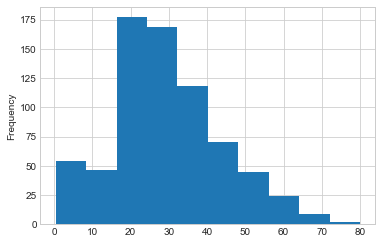

In [12]:
train['Age'].plot.hist()

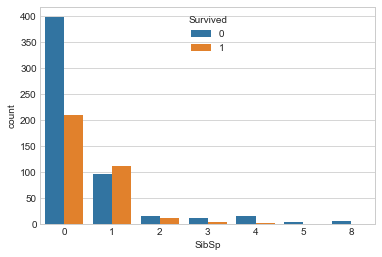

In [13]:
sns.countplot(x= 'SibSp', data= train, hue= 'Survived')

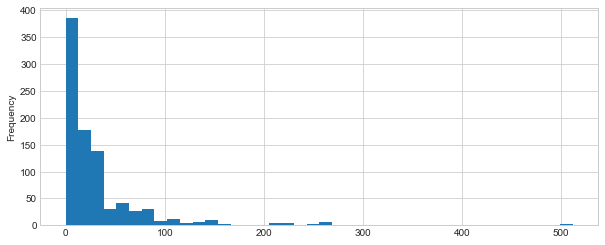

In [14]:
train['Fare'].plot.hist(by= 'Survived',bins= 40, figsize= (10,4))

In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

In [ ]:
#train['Fare'].iplot(kind= 'hist', bins= 40)

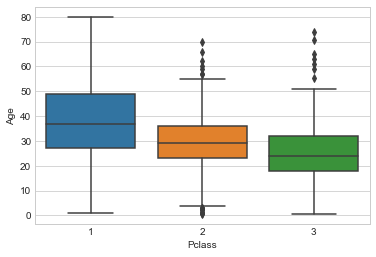

In [15]:
sns.boxplot(x='Pclass',y= 'Age', data= train, )

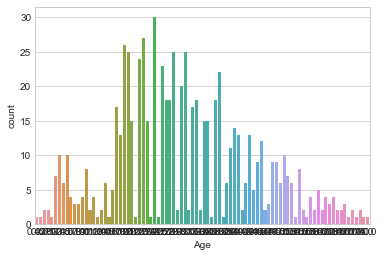

In [16]:
sns.countplot(x='Age', data= train)

In [17]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [18]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [19]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [22]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    if pd.isnull(Age):
        if Pclass== 1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [23]:
train['Age']= train[['Age','Pclass']].apply(impute_age, axis= 1)

In [24]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     25.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     25.0
29     25.0
       ... 
861    21.0
862    48.0
863    25.0
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

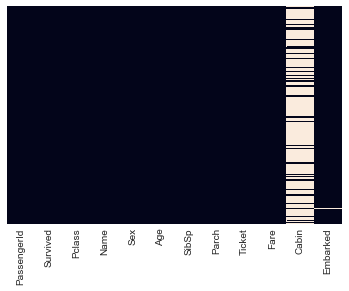

In [25]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False)

In [27]:
train['Embarked'].fillna('S', inplace= True)

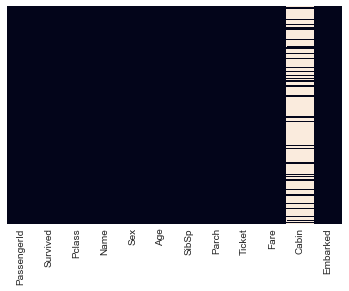

In [28]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False)

In [42]:
#train.drop('PassengerId' ,axis= 1, inplace= True)

In [38]:
train.drop('Cabin', axis=  1,inplace= True)

In [43]:
train.drop('Name', axis= 1, inplace= True)

In [45]:
train.drop('Ticket', axis=1 , inplace= True)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


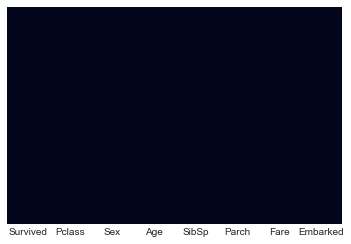

In [47]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False)

In [48]:
train['Sex']= pd.get_dummies(train['Sex'], drop_first= True)

In [59]:
train['S']= pd.get_dummies(train['Embarked'], drop_first = False)

In [60]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [62]:
train= train.rename(columns={'Sex': 'Male', 'Embarked': 'Q'})

In [63]:
train.head()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [65]:
y= train.pop('Survived')

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model= LogisticRegression()

In [70]:
model.fit(train, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
test= pd.read_csv('titanic_test.csv')

In [75]:
test.drop('PassengerId', axis=1, inplace= True)
test.drop('Name', axis=1, inplace= True)
test.drop('Ticket', axis=1, inplace= True)
test.drop('Cabin', axis=1, inplace= True)


In [78]:
test['Male']= pd.get_dummies(test['Sex'], drop_first= True)

In [80]:
test.drop('Sex', axis= 1, inplace= True)

,Pclass,Age,SibSp,Parch,Fare,Male
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [83]:
test['Age']= test[['Age','Pclass']].apply(impute_age, axis= 1)

In [84]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Male
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,29.527512,0.447368,0.392344,35.627188,0.636364
std,0.841838,12.851641,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [86]:
test['Fare'].fillna(test['Fare'].mean(), inplace= True)

In [87]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Male
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.527512,0.447368,0.392344,35.627188,0.636364
std,0.841838,12.851641,0.896760,0.981429,55.840500,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [110]:
pooja =pd.get_dummies(test['Embarked'], drop_first=  True)

In [112]:
test.drop('Q', axis=1, inplace= True)

In [113]:
test.drop('S', axis=1, inplace= True)

In [116]:
test= pd.concat([test, pooja])

In [120]:
model.predict(test)

ValueError: could not convert string to float: 'C'